Name - Yashraj Patil

In [1]:
#Importing libraries
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 


In [2]:
#loading file
loan_accepted = pd.read_csv('accepted_2007_to_2018q4.csv')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1508\1684888003.py:2: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_accepted = pd.read_csv('accepted_2007_to_2018q4.csv')


In [3]:
loan_accepted.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
loan_accepted.shape

(2260701, 151)

In [5]:

column_names = loan_accepted.columns.tolist()
# Print column names
for column in column_names:
    print(column)


id
member_id
loan_amnt
funded_amnt
funded_amnt_inv
term
int_rate
installment
grade
sub_grade
emp_title
emp_length
home_ownership
annual_inc
verification_status
issue_d
loan_status
pymnt_plan
url
desc
purpose
title
zip_code
addr_state
dti
delinq_2yrs
earliest_cr_line
fico_range_low
fico_range_high
inq_last_6mths
mths_since_last_delinq
mths_since_last_record
open_acc
pub_rec
revol_bal
revol_util
total_acc
initial_list_status
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_d
last_pymnt_amnt
next_pymnt_d
last_credit_pull_d
last_fico_range_high
last_fico_range_low
collections_12_mths_ex_med
mths_since_last_major_derog
policy_code
application_type
annual_inc_joint
dti_joint
verification_status_joint
acc_now_delinq
tot_coll_amt
tot_cur_bal
open_acc_6m
open_act_il
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq_fi
to

In [6]:
#checking the na values in data set
loan_accepted.isna().sum()

id                             0
member_id                2260701
loan_amnt                     33
funded_amnt                   33
funded_amnt_inv               33
                          ...   
settlement_status        2226455
settlement_date          2226455
settlement_amount        2226455
settlement_percentage    2226455
settlement_term          2226455
Length: 151, dtype: int64

In [7]:
#droping the column which have null data more than 3 %
Na_Percent =loan_accepted.isna().mean()*100

In [8]:
#setting threshold limit
threshold = 3

In [9]:
#getting List of column which have null data more than 50%
columns_to_drop= Na_Percent[Na_Percent>threshold].index.tolist()


In [10]:
#column with more 50% null data are droped
loan_accepted.drop(columns=columns_to_drop, inplace =True)

In [11]:
loan_accepted.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,...,mort_acc,num_bc_sats,num_sats,pub_rec_bankruptcies,tax_liens,total_bal_ex_mort,total_bc_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,68407277,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,MORTGAGE,...,1.0,2.0,7.0,0.0,0.0,7746.0,2400.0,N,Cash,N
1,68355089,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,MORTGAGE,...,4.0,13.0,22.0,0.0,0.0,39475.0,79300.0,N,Cash,N
2,68341763,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,MORTGAGE,...,5.0,2.0,6.0,0.0,0.0,18696.0,6200.0,N,Cash,N
3,66310712,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,MORTGAGE,...,1.0,8.0,13.0,0.0,0.0,52226.0,62500.0,N,Cash,N
4,68476807,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,MORTGAGE,...,6.0,5.0,12.0,0.0,0.0,95768.0,20300.0,N,Cash,N


In [12]:
#check the na values in data set
loan_accepted.isna().sum()

id                          0
loan_amnt                  33
funded_amnt                33
funded_amnt_inv            33
term                       33
                        ...  
total_bal_ex_mort       50063
total_bc_limit          50063
hardship_flag              33
disbursement_method        33
debt_settlement_flag       33
Length: 63, dtype: int64

In [13]:
loan_accepted.shape

(2260701, 63)

In [14]:
missing_values_count = loan_accepted.isna().sum()

# Filter columns with at least one missing value
columns_with_na = missing_values_count[missing_values_count > 0]

# Display column names and corresponding number of missing values
for column_name, na_count in columns_with_na.items():
    print(f"Column: {column_name}, Missing Values: {na_count}")

Column: loan_amnt, Missing Values: 33
Column: funded_amnt, Missing Values: 33
Column: funded_amnt_inv, Missing Values: 33
Column: term, Missing Values: 33
Column: int_rate, Missing Values: 33
Column: installment, Missing Values: 33
Column: grade, Missing Values: 33
Column: sub_grade, Missing Values: 33
Column: home_ownership, Missing Values: 33
Column: annual_inc, Missing Values: 37
Column: verification_status, Missing Values: 33
Column: issue_d, Missing Values: 33
Column: loan_status, Missing Values: 33
Column: pymnt_plan, Missing Values: 33
Column: url, Missing Values: 33
Column: purpose, Missing Values: 33
Column: title, Missing Values: 23359
Column: zip_code, Missing Values: 34
Column: addr_state, Missing Values: 33
Column: dti, Missing Values: 1744
Column: delinq_2yrs, Missing Values: 62
Column: earliest_cr_line, Missing Values: 62
Column: fico_range_low, Missing Values: 33
Column: fico_range_high, Missing Values: 33
Column: inq_last_6mths, Missing Values: 63
Column: open_acc, Mis

In [15]:
#droping na 
loan_accepted.dropna(axis=0,inplace=True)

In [16]:
loan_accepted.isna().sum()

id                      0
loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
                       ..
total_bal_ex_mort       0
total_bc_limit          0
hardship_flag           0
disbursement_method     0
debt_settlement_flag    0
Length: 63, dtype: int64

In [17]:
loan_accepted.shape

(2173046, 63)

In [18]:
loan_accepted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2173046 entries, 0 to 2260697
Data columns (total 63 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   id                          object 
 1   loan_amnt                   float64
 2   funded_amnt                 float64
 3   funded_amnt_inv             float64
 4   term                        object 
 5   int_rate                    float64
 6   installment                 float64
 7   grade                       object 
 8   sub_grade                   object 
 9   home_ownership              object 
 10  annual_inc                  float64
 11  verification_status         object 
 12  issue_d                     object 
 13  loan_status                 object 
 14  pymnt_plan                  object 
 15  url                         object 
 16  purpose                     object 
 17  title                       object 
 18  zip_code                    object 
 19  addr_state                

In [19]:
loan_accepted.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,...,acc_open_past_24mths,chargeoff_within_12_mths,delinq_amnt,mort_acc,num_bc_sats,num_sats,pub_rec_bankruptcies,tax_liens,total_bal_ex_mort,total_bc_limit
count,2.173046e+06,2.173046e+06,2.173046e+06,2.173046e+06,2.173046e+06,2.173046e+06,2.173046e+06,2.173046e+06,2.173046e+06,2.173046e+06,...,2.173046e+06,2.173046e+06,2.173046e+06,2.173046e+06,2.173046e+06,2.173046e+06,2.173046e+06,2.173046e+06,2.173046e+06,2.173046e+06
mean,1.513615e+04,1.513603e+04,1.513074e+04,1.310386e+01,4.484172e+02,7.837006e+04,1.895957e+01,3.104624e-01,6.982867e+02,7.022869e+02,...,4.525661e+00,8.657893e-03,1.247294e+01,1.556998e+00,4.780842e+00,1.164125e+01,1.303797e-01,4.778684e-02,5.116418e+04,2.326222e+04
std,9.210593e+03,9.210511e+03,9.208388e+03,4.847677e+00,2.676978e+02,1.143285e+05,1.431690e+01,8.735252e-01,3.288929e+01,3.289018e+01,...,3.165289e+00,1.060581e-01,7.292241e+02,1.904853e+00,3.036599e+00,5.644569e+00,3.673950e-01,3.813268e-01,4.999380e+04,2.304409e+04
min,1.000000e+03,1.000000e+03,7.250000e+02,5.310000e+00,4.930000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,6.600000e+02,6.640000e+02,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.000000e+03,8.000000e+03,8.000000e+03,9.490000e+00,2.542700e+02,4.674377e+04,1.200000e+01,0.000000e+00,6.750000e+02,6.790000e+02,...,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00,2.097400e+04,8.300000e+03
50%,1.300000e+04,1.300000e+04,1.300000e+04,1.262000e+01,3.808100e+02,6.500000e+04,1.796000e+01,0.000000e+00,6.900000e+02,6.940000e+02,...,4.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,3.798000e+04,1.630000e+04
75%,2.000000e+04,2.000000e+04,2.000000e+04,1.599000e+01,5.962800e+02,9.400000e+04,2.466000e+01,0.000000e+00,7.150000e+02,7.190000e+02,...,6.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,6.452200e+04,3.040000e+04
max,4.000000e+04,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,9.990000e+02,5.800000e+01,8.450000e+02,8.500000e+02,...,6.400000e+01,1.000000e+01,2.499250e+05,9.400000e+01,7.100000e+01,1.010000e+02,1.200000e+01,8.500000e+01,3.408095e+06,1.569000e+06


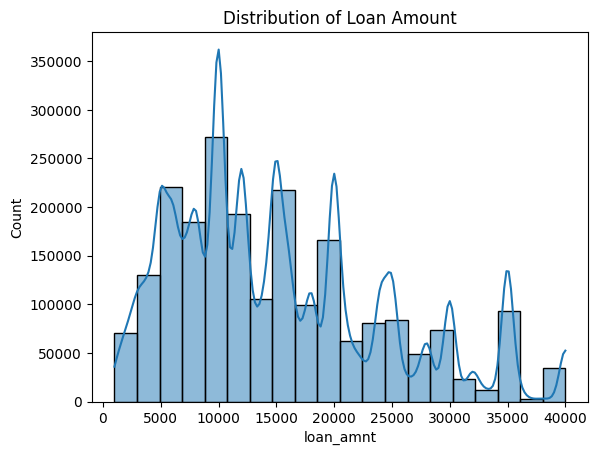

In [25]:
#hist plot check loan amount
sns.histplot(loan_accepted['loan_amnt'], bins=20, kde=True)
plt.title('Distribution of Loan Amount')
plt.show()

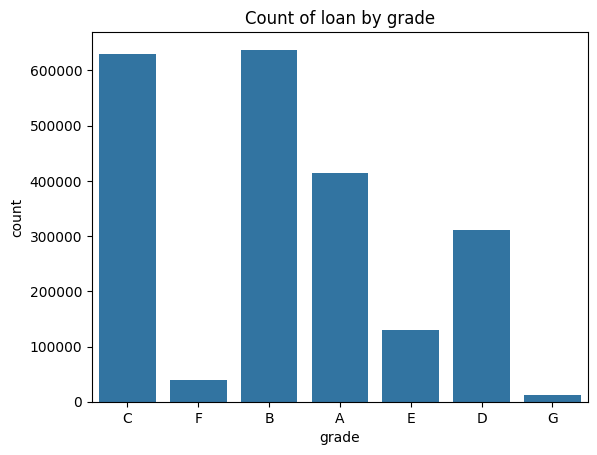

In [21]:
#to know count of grade to  rejected loan
sns.countplot(x='grade' , data= loan_accepted)
plt.title('Count of loan by grade')
plt.show()

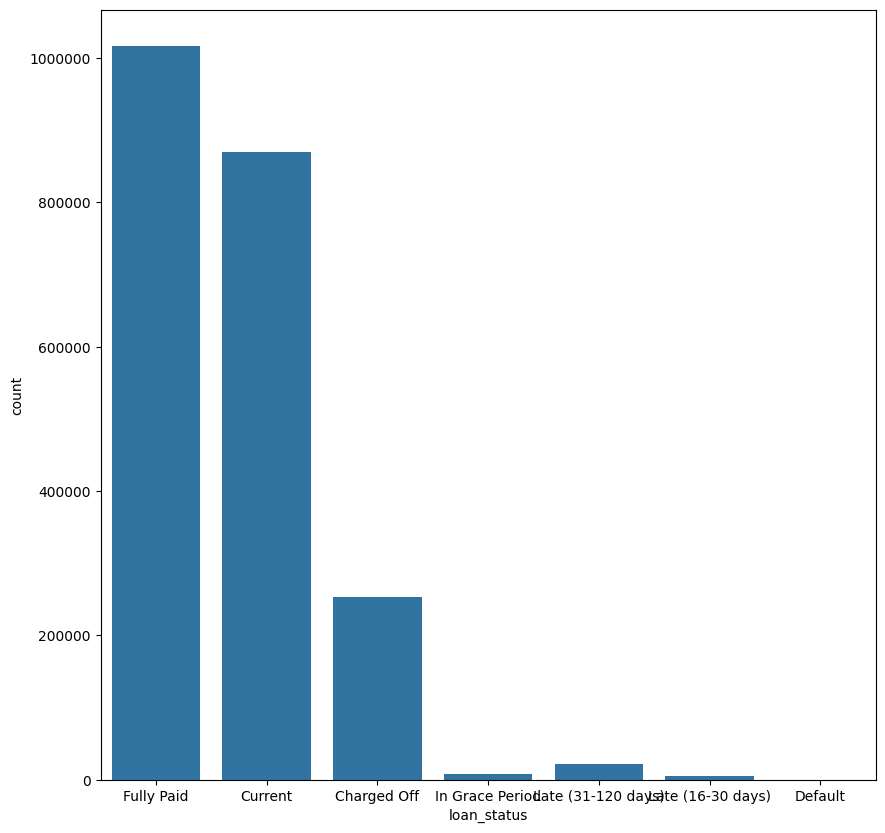

In [22]:
# checking loan status
plt.figure(figsize=(10,10))
ax= sns.countplot(x='loan_status' ,data = loan_accepted )
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.show()